**Face Detection**

Basically, in face detection we can detect if a face is there in an image and locate it. But, we won't know who's face is it, which comes under Face Recognition. We will be exploring face detection using the Haar Cascade Algorithm, which is a part of the Viola-Jones detection framework.

The main features that Viola-Jones proposes are:

1)Edge features (Two-rectangle)

2)Line Features (Three-rectangle)

3)Four-rectangle features

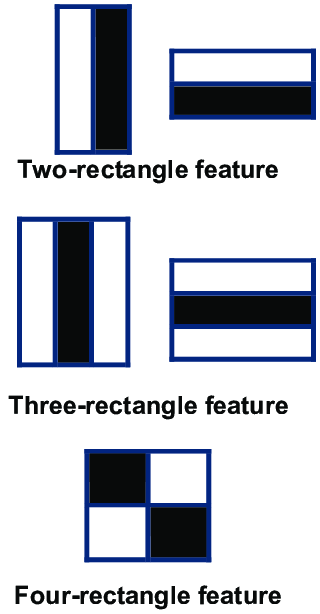

Each feature is a single value that is obtained from subtracting the sum of pixels under white rectangle from the sum of pixels under the black rectangle. In reality, our images would not be of perfect edges or lines.

These features are calculated by the mean(dark region) - mean(light region). We are taking the mean of the pixel values. For a perfect edge, the value will result to be 1. **Closer the result is to 1, the more better**. But, calculating these sums and taking it's averages could prove to be computaionally expensive. So, the Viola-Jones algorithm solves this issue by using the **integral image**.

An integral image is also known as a summed area table. The values of the summed area table can be understood by inspecting the below image. In an integral image, the value of each point is the sum of all of the pixels above and to the left, including our target pixel.

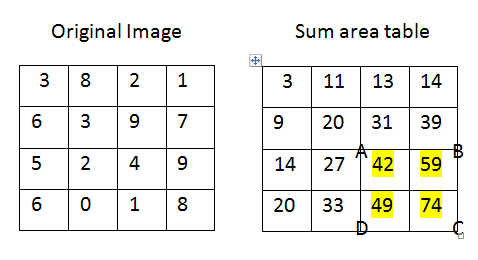

To sum up a subrectangle of its values, each colored spot highlights the sum inside the rectangle of that color. 

The algorithm saves time by going through a cascade of classifiers, which means we treat the image to a cascade of classifiers based on simple features. Once an image fails a classifier, we can stop attempting the face detection procedure.

For this algorithm, we need the person in the image to face front. Then we convert it to a grayscale image. After this we search for the Haar Cascade Features. Among the first few features, stands eyes and cheeks. The eyes probably is more darker than the cheeks. If the image fails for the search of this feature, then we can say that there is no face. Then we check the bridge of the nose. After this, the checking of more features goes on and on and on and on and on, until the face is detected.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
eazy = cv2.imread('C:/Users/email/OneDrive/Pictures/EazyE.jpg',0)
dre = cv2.imread('C:/Users/email/OneDrive/Pictures/DrDRE.jpg',0)
nobel = cv2.imread('C:/Users/email/OneDrive/Pictures/AlvinERoth.jpg',0) 

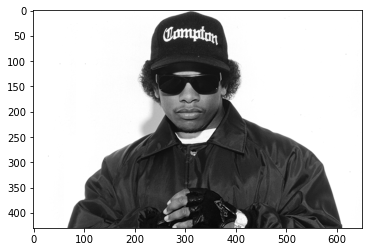

In [5]:
plt.imshow(eazy,cmap='gray') 

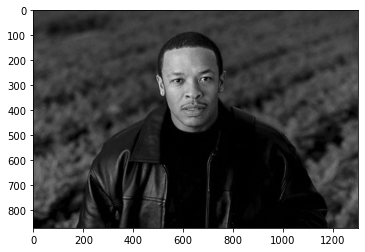

In [6]:
plt.imshow(dre,cmap='gray') 

In [10]:
# while True:
#     cv2.imshow('pic', nobel) 
#     if cv2.waitKey(1) & 0xFF == 27:
#         break
# cv2.destroyAllWindows() 

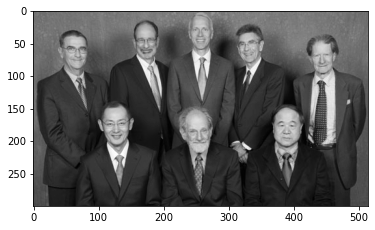

In [11]:
plt.imshow(nobel,cmap='gray') 

We use cv2.CascadeClassifier() to load the classifier from a given directory.

In [13]:
face_cascade = cv2.CascadeClassifier('C:/Users/email/OneDrive/Desktop/DL_Directories/Face Detection Cascades/haarcascades/haarcascade_frontalface_default.xml')

In [16]:
def detect_face(img):
    face_img = img.copy() 
    face_rectangle_coords = face_cascade.detectMultiScale(face_img) #Dimensions and coordinates of rectangle
    for (x,y,w,h) in face_rectangle_coords:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
    
    return face_img

In [17]:
result = detect_face(dre) 

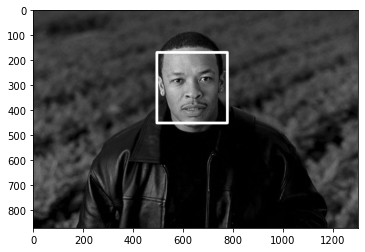

In [19]:
plt.imshow(result,cmap='gray')  

In [20]:
result = detect_face(nobel)  

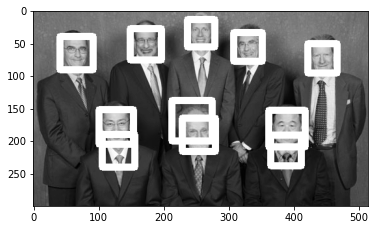

In [21]:
plt.imshow(result,cmap='gray') 

We have to add parameters like scaleFactor (specifies how much the image size is reduced at each image scale) and minNeighbours (specifies how many neighbors each candidate rectangle should have), as we are getting double faces detected.

In [23]:
def adjusted_detect_face(img):
    face_img = img.copy() 
    face_rectangle_coords = face_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=5)  #Dimensions and coordinates of rectangle
    for (x,y,w,h) in face_rectangle_coords:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
    
    return face_img

In [24]:
result = adjusted_detect_face(nobel) 

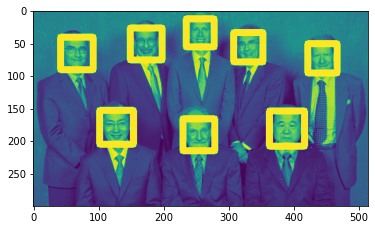

In [25]:
plt.imshow(result) 

In [26]:
eye_cascade = cv2.CascadeClassifier('C:/Users/email/OneDrive/Desktop/DL_Directories/Face Detection Cascades/haarcascades/haarcascade_eye.xml')

In [27]:
def detect_eyes(img):
    face_img = img.copy() 
    eye_rectangle_coords = eye_cascade.detectMultiScale(face_img) #Dimensions and coordinates of rectangle
    for (x,y,w,h) in eye_rectangle_coords:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
    
    return face_img

In [28]:
result = detect_eyes(dre) 

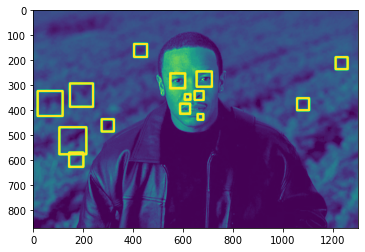

In [29]:
plt.imshow(result) 

Does Dr. Dre have more than 2 eyes? Hell no fosho! So we can use the additional parameters mentioned above to fix this issue, and to make sure only 2 eyes are being detected.

In [36]:
def adjusted_detect_eyes(img):
    face_img = img.copy() 
    eye_rectangle_coords = eye_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=7) #Dimensions and coordinates of rectangle
    for (x,y,w,h) in eye_rectangle_coords:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
    
    return face_img

In [37]:
result = adjusted_detect_eyes(dre) 

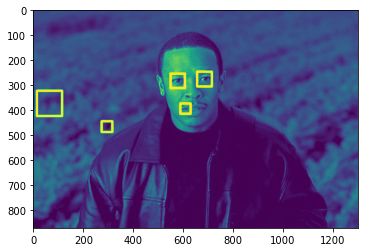

In [38]:
plt.imshow(result) 

It has improved though. This can be further improved by tweaking the parameter values.

In [39]:
cap = cv2.VideoCapture(0) 
while True:
    ret,frame = cap.read(0) 
    frame = adjusted_detect_face(frame) 
    cv2.imshow('Face Detect', frame) 
    k = cv2.waitKey(1) 
    if k == 27:
        break

cap.release() 
cv2.destroyAllWindows() 